# Análisis sobre profionales exlcuidos

Sobre [datos](https://gobiernoabierto.cordoba.gob.ar/data/datos-abiertos/categoria/exenciones/profesionales-excluidos/197) de la Municipalidad de Córdoba.

Nómina de profesionales excluidos

Documentación relacionada:
[Resolución Profesionales Exentos 06-17](https://gobiernoabierto.cordoba.gob.ar/media/cdn/Resoluci%C3%B3n_General_06-17_-_Exenciones_de_profesionales.pdf).  
[Resolución Prórroga 11-17](https://gobiernoabierto.cordoba.gob.ar/media/cdn/Resoluci%C3%B3n_General_11-17_-_Pr%C3%B3rroga_profesionales.pdf).  
  
### Aclaraciones
 - Aún falta la entrega de datos de algunos colegios profesionales
 - La obligatoriedad de matriculación y las normas son diferentes en cada profesión por lo que la lista publicada podría no incluir a todos los profesionales existentes.
  
**Importante**  
La publicación de la Nómina de Profesionales Excluidos ha sido discontinuada, de acuerdo a lo dispuesto por la [Resolución General 11/18](https://www.cordoba.gob.ar/wp-content/uploads/2018/04/rg-11-2018-profesionales.pdf).  


In [49]:
# Esta serie de datos se actualiza automáticamente vía el API de datos. 
# Podría automatizarse la deteccion de nuevos elemntos en la serie aquí:
# https://gobiernoabierto.cordoba.gob.ar/api/datos-abiertos/197/
#TODO automatizarlo

import requests
import os

csv_urls = {'2018-03': 'https://docs.google.com/feeds/download/spreadsheets/Export?key=1PQrcFTVzCB5rCKJ8FIKuF6dhhNWEyxzjsuzEJlPLG6o&exportFormat=csv&gid=819514763',
            '2018-01': 'https://docs.google.com/feeds/download/spreadsheets/Export?key=1tfjrLn3kA2kd_fVBSbcXk0su-onNw_QjKDXAyWoYqck&exportFormat=csv&gid=1836143984',
            '2017-11': 'https://docs.google.com/feeds/download/spreadsheets/Export?key=1A6BYpDQRdKfECfO6UHLm11sYwoyyy9pfZTdw_D-wYI0&exportFormat=csv&gid=0',
            '2017-09': 'https://docs.google.com/feeds/download/spreadsheets/Export?key=1ByqnW-29XBpNIBEIPNRM0hH_y55Vd1Owffk-78xxAWA&exportFormat=csv&gid=1343889109',
            # '2017-07': 'https://gobiernoabierto.cordoba.gob.ar/media/datos/N%C3%B3mina_de_profesionales_excluidos_-_Julio-2017.csv',
            '2017-05': 'https://gobiernoabierto.cordoba.gob.ar/media/datos/Nomina_de_profesionales_excluidos_-_Mayo-2017.csv',
            '2017-04': 'https://gobiernoabierto.cordoba.gob.ar/media/datos/Nomina_de_profesionales_excluidos_-_Abril-2017.csv'}

print('Buscando datos ...')
for mes, url in csv_urls.items():
    print('Buscando profesionales de {}'.format(mes))
    csv_file = 'data/profesionales-{}.csv'.format(mes)
    if os.path.isfile(csv_file):  # bajar los datos solo una vez
        print('Ya existe {}'.format(mes))
        continue
    print('Descargando {}'.format(mes))
    req = requests.get(url)
    f = open(csv_file, 'wb')
    f.write(req.content)
    f.close()
    print('Descargado OK {}'.format(mes))


Buscando datos ...
Buscando profesionales de 2018-03
Ya existe 2018-03
Buscando profesionales de 2018-01
Ya existe 2018-01
Buscando profesionales de 2017-11
Ya existe 2017-11
Buscando profesionales de 2017-09
Ya existe 2017-09
Buscando profesionales de 2017-05
Ya existe 2017-05
Buscando profesionales de 2017-04
Ya existe 2017-04


***** 2018-03 ******
***** 2018-01 ******
***** 2017-11 ******
***** 2017-09 ******
***** 2017-05 ******
***** 2017-04 ******
{'Médico': {'2018-03': 12044, '2018-01': 12052, '2017-11': 11710, '2017-09': 15817}, 'Contador': {'2018-03': 11208, '2018-01': 11208, '2017-11': 11207, '2017-09': 11202, '2017-05': 11212, '2017-04': 11208}, 'Abogado': {'2018-03': 10230, '2018-01': 10245, '2017-11': 10174, '2017-09': 9815, '2017-05': 9669, '2017-04': 9576}, 'Kinesiólogo': {'2018-03': 4884, '2018-01': 4915, '2017-11': 4881, '2017-09': 4810}, 'Ingeniero especialista': {'2018-03': 3844, '2018-01': 3733, '2017-11': 3733, '2017-09': 3733, '2017-05': 3663, '2017-04': 3651}, 'Odontólogo': {'2018-03': 3723, '2018-01': 3739, '2017-11': 3724, '2017-09': 3719, '2017-05': 2717}, 'Martillero y Corredor Público': {'2018-03': 3645, '2018-01': 3648, '2017-11': 3602, '2017-09': 3601, '2017-05': 3602, '2017-04': 3600}, 'Psicólogo': {'2018-03': 2155, '2018-01': 2091, '2017-11': 2073, '2017-09': 2018, '2017-05': 180

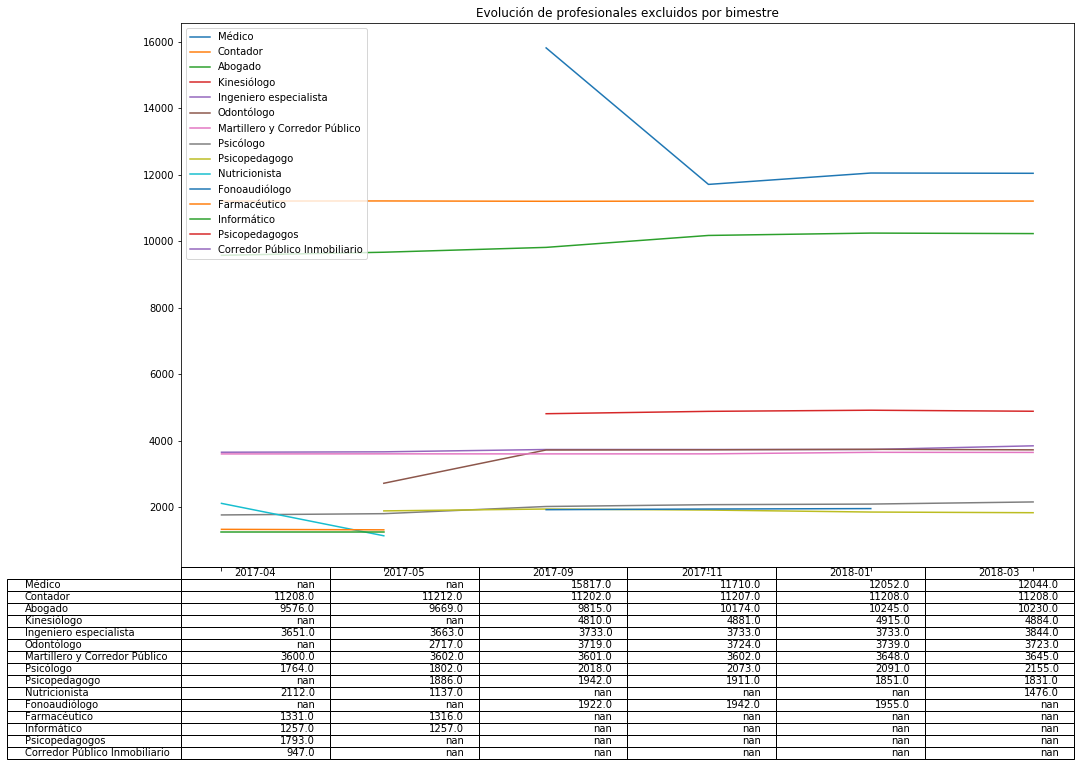

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import slugify

profesionales = {}
# los meses son mis columnas
columns = csv_urls.keys()
acumulados = {}
final = {}

for mes, url in csv_urls.items():
    csv_file = 'data/profesionales-{}.csv'.format(mes)
    profesionales[mes] = pd.read_csv(csv_file)
    if len(profesionales[mes].keys()) < 3:
        # debe tener punto y comas ... 
        profesionales[mes] = pd.read_csv(csv_file, sep=';')
    
    # profesionales[mes]['Profesión'].apply(slugify.slugify)
    # print(profesionales[mes].keys())
    acumulados[mes] = profesionales[mes]['Profesión'].value_counts()[:10]

    print('***** {} ******'.format(mes))
    # print(acumulados[mes])
    for profesion, total in acumulados[mes].items():
        if profesion not in final.keys():
            final[profesion] = {}
        final[profesion][mes] = total
    
print(final)
df = pd.DataFrame(final)
# df.plot(kind='bar', figsize=[16,5])

df.plot(title='Evolución de profesionales excluidos por bimestre',
        kind='line',
        figsize=[16,10],
        legend=True,
        table=True)